In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/sentinel/export_dataframe_NO2_V3.zip')#, sep=';')

In [3]:
# Center lat and lot aux columns
df_res = pd.read_csv('../data/result/joined_result.csv')
lat, lon = df_res['S_lat'].iloc[0], df_res['S_lon'].iloc[0]
df['lon'] = df['longitudes'] - lon
df['lat'] = df['latitudes'] - lat

In [4]:
df

,longitudes,latitudes,NO2,time,date,file,lon,lat
0,-1.090508,35.000458,0.000019,1.553089e+09,2019-03-20 13:30:50.163766861,S5P_NRTI_L2__NO2____20190320T132831_20190320T1...,2.656839,-5.418898
1,-1.648795,35.015553,0.000023,1.553089e+09,2019-03-20 13:30:51.243742466,S5P_NRTI_L2__NO2____20190320T132831_20190320T1...,2.098552,-5.403803
2,-1.595972,35.020490,0.000022,1.553089e+09,2019-03-20 13:30:51.243742466,S5P_NRTI_L2__NO2____20190320T132831_20190320T1...,2.151375,-5.398866
3,-1.542824,35.025400,0.000027,1.553089e+09,2019-03-20 13:30:51.243742466,S5P_NRTI_L2__NO2____20190320T132831_20190320T1...,2.204523,-5.393956
4,-1.489346,35.030277,0.000027,1.553089e+09,2019-03-20 13:30:51.243742466,S5P_NRTI_L2__NO2____20190320T132831_20190320T1...,2.258001,-5.389079
5,-1.216789,35.054226,0.000014,1.553089e+09,2019-03-20 13:30:51.243742466,S5P_NRTI_L2__NO2____20190320T132831_20190320T1...,2.530558,-5.365130
6,-1.161201,35.058926,0.000007,1.553089e+09,2019-03-20 13:30:51.243742466,S5P_NRTI_L2__NO2____20190320T132831_20190320T1...,2.586147,-5.360430
7,-1.105238,35.063595,0.000013,1.553089e+09,2019-03-20 13:30:51.243742466,S5P_NRTI_L2__NO2____20190320T132831_20190320T1...,2.642110,-5.355761
8,-1.048894,35.068230,0.000019,1.553089e+09,2019-03-20 13:30:51.243742466,S5P_NRTI_L2__NO2____20190320T132831_20190320T1...,2.698454,-5.351126
9,-2.421495,35.001396,0.000015,1.553089e+09,2019-03-20 13:30:52.323718309,S5P_NRTI_L2__NO2____20190320T132831_20190320T1...,1.325852,-5.417960


In [5]:
from scipy import interpolate

margin = 0.2 # Filters a small region around point of interest to make interpolation faster (-+margin degrees around sensor)
n_points = 10

times = []
images = []

for nc in df['file'].unique():
    print('Current file: ', nc)
    df_nc = df[df['file'] == nc]
    df_nc_fil = df_nc[((df_nc['lon']>=-margin) &
          (df_nc['lon']<=margin) &
          (df_nc['lat']>=-margin) &
          (df_nc['lat']<=margin))]
    
    # Interpolation
    x = df_nc_fil['lon'].values
    y = df_nc_fil['lat'].values
    z = df_nc_fil['NO2'].values
    try:
        f = interpolate.interp2d(x, y, z, kind='linear',bounds_error=False, fill_value=np.nan) # Fills with nan extrapolation points
    except:
        # If not enough points in grid to extrapolate, ignore this nc
        continue
    xnew = np.linspace(-margin,margin,n_points)
    ynew = np.linspace(-margin,margin,n_points)
    znew = f(xnew, ynew)
    
    # Gets time of the satellite over the closest latitude to the sensor and rounds to next hour
    time = pd.to_datetime(df_nc_fil[df_nc_fil.index == df_nc_fil['lon'].abs().idxmin()]['date']).dt.round('h').values[0]

    images.append(znew)
    times.append(time)

Current file:  S5P_NRTI_L2__NO2____20190320T132831_20190320T133331_07422_01_010202_20190320T140750.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,8 m=47 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_NRTI_L2__NO2____20190321T130831_20190321T131331_07436_01_010202_20190321T134753.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=8,12 m=57 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_NRTI_L2__NO2____20190321T131331_20190321T131831_07436_01_010202_20190321T134935.nc
Current file:  S5P_NRTI_L2__NO2____20190322T125331_20190322T125831_07450_01_010202_20190322T133012.nc
Current file:  S5P_NRTI_L2__NO2____20190323T123331_20190323T123831_07464_01_010202_20190323T131115.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=1,1 nx,ny=8,7 m=26 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_NRTI_L2__NO2____20190323T141331_20190323T141831_07465_01_010202_20190323T145204.nc
Current file:  S5P_NRTI_L2__NO2____20190324T121331_20190324T121831_07478_01_010202_20190324T125720.nc
Current file:  S5P_NRTI_L2__NO2____20190324T135331_20190324T135831_07479_01_010202_20190324T143207.nc
Current file:  S5P_NRTI_L2__NO2____20190325T133331_20190325T133831_07493_01_010202_20190325T141330.nc
Current file:  S5P_NRTI_L2__NO2____20190325T133831_20190325T134331_07493_01_010202_20190325T141415.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=9,8 m=40 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_NRTI_L2__NO2____20190326T131831_20190326T132331_07507_01_010202_20190326T135301.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=8,12 m=56 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_NRTI_L2__NO2____20190328T123832_20190328T124332_07535_01_010300_20190328T131918.nc
Current file:  S5P_NRTI_L2__NO2____20190329T122332_20190329T122832_07549_01_010300_20190329T130117.nc
Current file:  S5P_NRTI_L2__NO2____20190329T140332_20190329T140832_07550_01_010300_20190329T143750.nc
Current file:  S5P_NRTI_L2__NO2____20190330T120332_20190330T120832_07563_01_010300_20190330T124206.nc
Current file:  S5P_NRTI_L2__NO2____20190330T134332_20190330T134832_07564_01_010300_20190330T142013.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=7,9 m=34 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_NRTI_L2__NO2____20190331T132332_20190331T132832_07578_01_010300_20190331T140051.nc
Current file:  S5P_NRTI_L2__NO2____20190401T130332_20190401T130832_07592_01_010300_20190401T134258.nc
Current file:  S5P_NRTI_L2__NO2____20190403T140630_20190403T141130_07621_01_010300_20190403T144325.nc
Current file:  S5P_NRTI_L2__NO2____20190404T120630_20190404T121130_07634_01_010300_20190404T124437.nc
Current file:  S5P_NRTI_L2__NO2____20190404T121130_20190404T121630_07634_01_010300_20190404T124926.nc
Current file:  S5P_NRTI_L2__NO2____20190404T134630_20190404T135130_07635_01_010300_20190404T142301.nc
Current file:  S5P_NRTI_L2__NO2____20190405T133130_20190405T133630_07649_01_010300_20190405T140632.nc
Current file:  S5P_NRTI_L2__NO2____20190406T131130_20190406T131630_07663_01_010300_20190406T134906.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=6,5 m=10 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_NRTI_L2__NO2____20190407T125130_20190407T125630_07677_01_010300_20190407T132935.nc
Current file:  S5P_NRTI_L2__NO2____20190408T123130_20190408T123630_07691_01_010300_20190408T131109.nc
Current file:  S5P_NRTI_L2__NO2____20190408T141130_20190408T141630_07692_01_010300_20190408T144829.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too small or too large
a weight to an inaccurate data point. (fp>s)
	kx,ky=1,1 nx,ny=5,4 m=6 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_NRTI_L2__NO2____20190408T141630_20190408T142130_07692_01_010300_20190408T145147.nc
Current file:  S5P_NRTI_L2__NO2____20190409T121630_20190409T122130_07705_01_010300_20190409T125626.nc
Current file:  S5P_NRTI_L2__NO2____20190409T135630_20190409T140130_07706_01_010300_20190409T143300.nc
Current file:  S5P_NRTI_L2__NO2____20190410T133630_20190410T134130_07720_01_010300_20190410T141108.nc
Current file:  S5P_NRTI_L2__NO2____20190411T113630_20190411T114130_07733_01_010300_20190411T121945.nc
Current file:  S5P_NRTI_L2__NO2____20190411T131630_20190411T132130_07734_01_010300_20190411T135439.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=6,7 m=17 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_NRTI_L2__NO2____20190412T125630_20190412T130130_07748_01_010300_20190412T133706.nc
Current file:  S5P_NRTI_L2__NO2____20190412T130130_20190412T130630_07748_01_010300_20190412T133829.nc
Current file:  S5P_NRTI_L2__NO2____20190412T143630_20190412T144130_07749_01_010300_20190412T151355.nc
Current file:  S5P_NRTI_L2__NO2____20190412T144130_20190412T144630_07749_01_010300_20190412T151431.nc
Current file:  S5P_NRTI_L2__NO2____20190413T123630_20190413T124130_07762_01_010300_20190413T131420.nc
Current file:  S5P_NRTI_L2__NO2____20190413T124130_20190413T124630_07762_01_010300_20190413T131657.nc
Current file:  S5P_NRTI_L2__NO2____20190413T141630_20190413T142130_07763_01_010300_20190413T145511.nc
Current file:  S5P_NRTI_L2__NO2____20190413T142130_20190413T142630_07763_01_010300_20190413T145556.nc
Current file:  S5P_NRTI_L2__NO2____20190414T121630_20190414T122130_07776_01_010300_20190414T125954.nc
Current file:  S5P_NRTI_L2__NO2____20190414T122130_20190414T122630_07776_01_010300

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=8,11 m=52 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_NRTI_L2__NO2____20190416T132635_20190416T133135_07805_01_010300_20190416T140135.nc
Current file:  S5P_NRTI_L2__NO2____20190417T112635_20190417T113135_07818_01_010300_20190417T120521.nc
Current file:  S5P_NRTI_L2__NO2____20190417T130135_20190417T130635_07819_01_010300_20190417T134013.nc
Current file:  S5P_NRTI_L2__NO2____20190417T130635_20190417T131135_07819_01_010300_20190417T134201.nc
Current file:  S5P_NRTI_L2__NO2____20190418T124135_20190418T124635_07833_01_010300_20190418T132119.nc
Current file:  S5P_NRTI_L2__NO2____20190418T124635_20190418T125135_07833_01_010300_20190418T132229.nc
Current file:  S5P_NRTI_L2__NO2____20190418T142635_20190418T143135_07834_01_010300_20190418T150018.nc
Current file:  S5P_NRTI_L2__NO2____20190419T122635_20190419T123135_07847_01_010300_20190419T130712.nc
Current file:  S5P_NRTI_L2__NO2____20190419T140635_20190419T141135_07848_01_010300_20190419T144410.nc
Current file:  S5P_NRTI_L2__NO2____20190420T120635_20190420T121135_07861_01_010300

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=9,10 m=52 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_NRTI_L2__NO2____20190423T125135_20190423T125635_07904_01_010300_20190423T132645.nc
Current file:  S5P_NRTI_L2__NO2____20190423T143135_20190423T143635_07905_01_010300_20190423T150712.nc
Current file:  S5P_NRTI_L2__NO2____20190423T143635_20190423T144135_07905_01_010300_20190423T151234.nc
Current file:  S5P_NRTI_L2__NO2____20190424T123135_20190424T123635_07918_01_010300_20190424T130828.nc
Current file:  S5P_NRTI_L2__NO2____20190424T123635_20190424T124135_07918_01_010300_20190424T131331.nc
Current file:  S5P_NRTI_L2__NO2____20190424T141135_20190424T141635_07919_01_010300_20190424T144738.nc
Current file:  S5P_NRTI_L2__NO2____20190424T141635_20190424T142135_07919_01_010300_20190424T144838.nc
Current file:  S5P_NRTI_L2__NO2____20190425T121135_20190425T121635_07932_01_010300_20190425T125122.nc
Current file:  S5P_NRTI_L2__NO2____20190425T121635_20190425T122135_07932_01_010300_20190425T125603.nc
Current file:  S5P_NRTI_L2__NO2____20190425T135135_20190425T135635_07933_01_010300

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=7,6 m=17 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20180702T104927_20180702T123056_03718_01_010002_20180708T123326.nc
Current file:  S5P_OFFL_L2__NO2____20180702T123056_20180702T141226_03719_01_010002_20180708T142030.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=9,10 m=50 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20180703T103024_20180703T121154_03732_01_010002_20180709T122130.nc
Current file:  S5P_OFFL_L2__NO2____20180703T121154_20180703T135323_03733_01_010002_20180709T141059.nc
Current file:  S5P_OFFL_L2__NO2____20180703T135323_20180703T153453_03734_01_010002_20180709T153628.nc
Current file:  S5P_OFFL_L2__NO2____20180704T115251_20180704T133421_03747_01_010002_20180710T134530.nc
Current file:  S5P_OFFL_L2__NO2____20180704T133421_20180704T151550_03748_01_010002_20180710T151938.nc
Current file:  S5P_OFFL_L2__NO2____20180705T113348_20180705T131518_03761_01_010002_20180712T111018.nc
Current file:  S5P_OFFL_L2__NO2____20180705T131518_20180705T145647_03762_01_010002_20180712T110212.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=5,5 m=8 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20180706T111445_20180706T125614_03775_01_010002_20180712T174332.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=7,7 m=24 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20180706T125614_20180706T143744_03776_01_010002_20180712T172440.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=8,7 m=29 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20180707T105542_20180707T123711_03789_01_010002_20180713T124815.nc
Current file:  S5P_OFFL_L2__NO2____20180707T123711_20180707T141841_03790_01_010002_20180713T141009.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=9,9 m=46 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20180708T103638_20180708T121808_03803_01_010002_20180714T122005.nc
Current file:  S5P_OFFL_L2__NO2____20180708T121808_20180708T135938_03804_01_010002_20180714T140731.nc
Current file:  S5P_OFFL_L2__NO2____20180709T134034_20180709T152204_03819_01_010002_20180715T151813.nc
Current file:  S5P_OFFL_L2__NO2____20180710T114001_20180710T132131_03832_01_010002_20180716T133412.nc
Current file:  S5P_OFFL_L2__NO2____20180710T132131_20180710T150301_03833_01_010002_20180716T150013.nc
Current file:  S5P_OFFL_L2__NO2____20180711T112058_20180711T130227_03846_01_010002_20180717T130729.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=8,6 m=21 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20180711T130227_20180711T144357_03847_01_010002_20180717T144423.nc
Current file:  S5P_OFFL_L2__NO2____20180712T110154_20180712T124324_03860_01_010100_20180718T192749.nc
Current file:  S5P_OFFL_L2__NO2____20180712T124324_20180712T142453_03861_01_010100_20180718T211312.nc
Current file:  S5P_OFFL_L2__NO2____20180713T104250_20180713T122420_03874_01_010100_20180719T122110.nc
Current file:  S5P_OFFL_L2__NO2____20180713T122420_20180713T140550_03875_01_010100_20180719T141738.nc
Current file:  S5P_OFFL_L2__NO2____20180714T120516_20180714T134646_03889_01_010100_20180720T140533.nc
Current file:  S5P_OFFL_L2__NO2____20180714T134646_20180714T152815_03890_01_010100_20180720T153344.nc
Current file:  S5P_OFFL_L2__NO2____20180715T114612_20180715T132742_03903_01_010100_20180721T134158.nc
Current file:  S5P_OFFL_L2__NO2____20180715T132742_20180715T150911_03904_01_010100_20180721T150836.nc
Current file:  S5P_OFFL_L2__NO2____20180716T112708_20180716T130838_03917_01_010100

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=9,10 m=54 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20180719T102955_20180719T121125_03959_01_010100_20180820T120913.nc
Current file:  S5P_OFFL_L2__NO2____20180719T121125_20180719T135255_03960_01_010100_20180725T135129.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=8,11 m=53 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20180719T135255_20180719T153424_03961_01_010100_20180725T153144.nc
Current file:  S5P_OFFL_L2__NO2____20180720T115220_20180720T133350_03974_01_010100_20180726T133640.nc
Current file:  S5P_OFFL_L2__NO2____20180720T133350_20180720T151520_03975_01_010100_20180726T151306.nc
Current file:  S5P_OFFL_L2__NO2____20180721T113316_20180721T131446_03988_01_010100_20180727T131634.nc
Current file:  S5P_OFFL_L2__NO2____20180721T131446_20180721T145615_03989_01_010100_20180727T144951.nc
Current file:  S5P_OFFL_L2__NO2____20180722T111411_20180722T125541_04002_01_010100_20180730T073319.nc
Current file:  S5P_OFFL_L2__NO2____20180722T125541_20180722T143711_04003_01_010100_20180730T073819.nc
Current file:  S5P_OFFL_L2__NO2____20180723T105507_20180723T123636_04016_01_010100_20180729T123428.nc
Current file:  S5P_OFFL_L2__NO2____20180723T123636_20180723T141806_04017_01_010100_20180729T142119.nc
Current file:  S5P_OFFL_L2__NO2____20180724T103602_20180724T121731_04030_01_010100

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=8,9 m=41 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20180729T104206_20180729T122336_04101_01_010100_20180804T122207.nc
Current file:  S5P_OFFL_L2__NO2____20180729T122336_20180729T140505_04102_01_010100_20180804T141749.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=57 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20180730T120431_20180730T134600_04116_01_010100_20180805T140626.nc
Current file:  S5P_OFFL_L2__NO2____20180730T134600_20180730T152730_04117_01_010100_20180805T152919.nc
Current file:  S5P_OFFL_L2__NO2____20180731T114525_20180731T132655_04130_01_010100_20180806T132929.nc
Current file:  S5P_OFFL_L2__NO2____20180731T132655_20180731T150824_04131_01_010100_20180806T150549.nc
Current file:  S5P_OFFL_L2__NO2____20180801T112620_20180801T130749_04144_01_010100_20180807T155605.nc
Current file:  S5P_OFFL_L2__NO2____20180801T130749_20180801T144919_04145_01_010100_20180807T151024.nc
Current file:  S5P_OFFL_L2__NO2____20180802T110714_20180802T124844_04158_01_010100_20180808T130759.nc
Current file:  S5P_OFFL_L2__NO2____20180802T124844_20180802T143013_04159_01_010100_20180808T212915.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=8,9 m=36 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20180803T104809_20180803T122938_04172_01_010100_20180809T124503.nc
Current file:  S5P_OFFL_L2__NO2____20180803T122938_20180803T141108_04173_01_010100_20180809T141108.nc
Current file:  S5P_OFFL_L2__NO2____20180804T102903_20180804T121033_04186_01_010100_20180810T121853.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=9,10 m=53 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20180804T121033_20180804T135202_04187_01_010100_20180810T135859.nc
Current file:  S5P_OFFL_L2__NO2____20180805T115127_20180805T133256_04201_01_010100_20180811T131759.nc
Current file:  S5P_OFFL_L2__NO2____20180806T113221_20180806T131351_04215_01_010100_20180812T132509.nc
Current file:  S5P_OFFL_L2__NO2____20180806T131351_20180806T145520_04216_01_010100_20180812T152514.nc
Current file:  S5P_OFFL_L2__NO2____20180807T111315_20180807T125445_04229_01_010100_20180813T130628.nc
Current file:  S5P_OFFL_L2__NO2____20180807T125445_20180807T143614_04230_01_010100_20180813T150632.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=9,6 m=27 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20180808T105409_20180808T123539_04243_01_010100_20180814T124845.nc
Current file:  S5P_OFFL_L2__NO2____20180808T123539_20180808T141708_04244_01_010100_20180814T145557.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,9 m=50 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20180809T103503_20180809T121633_04257_01_010100_20180815T123018.nc
Current file:  S5P_OFFL_L2__NO2____20180809T121633_20180809T135802_04258_01_010100_20180815T141816.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,9 m=58 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20180810T115727_20180810T133856_04272_01_010100_20180816T134618.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=7,10 m=39 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20180810T133856_20180810T152026_04273_01_010100_20180816T151428.nc
Current file:  S5P_OFFL_L2__NO2____20180812T111914_20180812T130044_04300_01_010100_20180818T140029.nc
Current file:  S5P_OFFL_L2__NO2____20180812T130044_20180812T144213_04301_01_010100_20180818T150611.nc
Current file:  S5P_OFFL_L2__NO2____20180813T110008_20180813T124138_04314_01_010100_20180819T125957.nc
Current file:  S5P_OFFL_L2__NO2____20180813T124138_20180813T142307_04315_01_010100_20180819T144521.nc
Current file:  S5P_OFFL_L2__NO2____20180814T104102_20180814T122231_04328_01_010100_20180820T153830.nc
Current file:  S5P_OFFL_L2__NO2____20180814T122231_20180814T140401_04329_01_010100_20180820T161723.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=9,11 m=57 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20180815T120325_20180815T134454_04343_01_010100_20180821T141933.nc
Current file:  S5P_OFFL_L2__NO2____20180815T134454_20180815T152624_04344_01_010100_20180821T154713.nc
Current file:  S5P_OFFL_L2__NO2____20180816T114418_20180816T132548_04357_01_010100_20180822T133740.nc
Current file:  S5P_OFFL_L2__NO2____20180816T132548_20180816T150717_04358_01_010100_20180822T151512.nc
Current file:  S5P_OFFL_L2__NO2____20180817T112512_20180817T130641_04371_01_010100_20180823T133927.nc
Current file:  S5P_OFFL_L2__NO2____20180817T130641_20180817T144811_04372_01_010100_20180823T151951.nc
Current file:  S5P_OFFL_L2__NO2____20180818T110605_20180818T124735_04385_01_010100_20180824T125459.nc
Current file:  S5P_OFFL_L2__NO2____20180818T124735_20180818T142904_04386_01_010100_20180824T150249.nc
Current file:  S5P_OFFL_L2__NO2____20180819T104659_20180819T122828_04399_01_010100_20180825T124544.nc
Current file:  S5P_OFFL_L2__NO2____20180819T122828_20180819T140957_04400_01_010100

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=9,10 m=55 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20180820T135051_20180820T153220_04415_01_010100_20180826T154458.nc
Current file:  S5P_OFFL_L2__NO2____20180821T115014_20180821T133144_04428_01_010100_20180827T140434.nc
Current file:  S5P_OFFL_L2__NO2____20180821T133144_20180821T151313_04429_01_010100_20180827T154251.nc
Current file:  S5P_OFFL_L2__NO2____20180822T113108_20180822T131237_04442_01_010100_20180828T132347.nc
Current file:  S5P_OFFL_L2__NO2____20180822T131237_20180822T145407_04443_01_010100_20180828T153150.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=6,6 m=15 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20180823T111201_20180823T125330_04456_01_010100_20180829T130558.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=1,1 nx,ny=7,7 m=23 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20180823T125330_20180823T143500_04457_01_010100_20180829T145855.nc
Current file:  S5P_OFFL_L2__NO2____20180824T105254_20180824T123423_04470_01_010100_20180830T123411.nc
Current file:  S5P_OFFL_L2__NO2____20180824T123423_20180824T141553_04471_01_010100_20180830T142553.nc
Current file:  S5P_OFFL_L2__NO2____20180825T103347_20180825T121516_04484_01_010100_20180831T121528.nc
Current file:  S5P_OFFL_L2__NO2____20180825T121516_20180825T135646_04485_01_010100_20180831T142248.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=9,11 m=56 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20180826T115609_20180826T133739_04499_01_010100_20180901T135219.nc
Current file:  S5P_OFFL_L2__NO2____20180826T133739_20180826T151908_04500_01_010100_20180901T154726.nc
Current file:  S5P_OFFL_L2__NO2____20180827T113702_20180827T131832_04513_01_010100_20180902T133139.nc
Current file:  S5P_OFFL_L2__NO2____20180827T131832_20180827T150001_04514_01_010100_20180902T151058.nc
Current file:  S5P_OFFL_L2__NO2____20180828T111755_20180828T125924_04527_01_010100_20180903T131034.nc
Current file:  S5P_OFFL_L2__NO2____20180828T125924_20180828T144054_04528_01_010100_20180903T145538.nc
Current file:  S5P_OFFL_L2__NO2____20180829T105848_20180829T124017_04541_01_010100_20180904T124601.nc
Current file:  S5P_OFFL_L2__NO2____20180829T124017_20180829T142147_04542_01_010100_20180904T150207.nc
Current file:  S5P_OFFL_L2__NO2____20180830T103941_20180830T122110_04555_01_010100_20180905T124039.nc
Current file:  S5P_OFFL_L2__NO2____20180830T122110_20180830T140239_04556_01_010100

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=1,1 nx,ny=8,8 m=30 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20180901T132425_20180901T150554_04585_01_010100_20180907T150905.nc
Current file:  S5P_OFFL_L2__NO2____20180902T112348_20180902T130517_04598_01_010100_20180908T130713.nc
Current file:  S5P_OFFL_L2__NO2____20180902T130517_20180902T144647_04599_01_010100_20180908T150753.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=7,6 m=19 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20180903T110440_20180903T124610_04612_01_010100_20180909T131424.nc
Current file:  S5P_OFFL_L2__NO2____20180903T124610_20180903T142739_04613_01_010100_20180909T145929.nc
Current file:  S5P_OFFL_L2__NO2____20180904T104533_20180904T122702_04626_01_010100_20180910T123307.nc
Current file:  S5P_OFFL_L2__NO2____20180904T122702_20180904T140832_04627_01_010100_20180910T143348.nc
Current file:  S5P_OFFL_L2__NO2____20180905T102625_20180905T120755_04640_01_010100_20180911T210356.nc
Current file:  S5P_OFFL_L2__NO2____20180905T120755_20180905T134924_04641_01_010100_20180911T210314.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,9 m=55 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20180905T134924_20180905T153054_04642_01_010100_20180911T204638.nc
Current file:  S5P_OFFL_L2__NO2____20180906T114847_20180906T133017_04655_01_010100_20180914T095528.nc
Current file:  S5P_OFFL_L2__NO2____20180906T133017_20180906T151146_04656_01_010100_20180914T100103.nc
Current file:  S5P_OFFL_L2__NO2____20180907T131109_20180907T145238_04670_01_010100_20180915T075502.nc
Current file:  S5P_OFFL_L2__NO2____20180908T111032_20180908T125201_04683_01_010100_20180914T131441.nc
Current file:  S5P_OFFL_L2__NO2____20180908T125201_20180908T143331_04684_01_010100_20180914T144638.nc
Current file:  S5P_OFFL_L2__NO2____20180909T105124_20180909T123254_04697_01_010100_20180915T130106.nc
Current file:  S5P_OFFL_L2__NO2____20180910T103216_20180910T121346_04711_01_010100_20180916T123127.nc
Current file:  S5P_OFFL_L2__NO2____20180911T133607_20180911T151737_04727_01_010100_20180917T151944.nc
Current file:  S5P_OFFL_L2__NO2____20180912T113530_20180912T131700_04740_01_010100

Current file:  S5P_OFFL_L2__NO2____20181030T113020_20181030T131149_05421_01_010200_20181105T132345.nc
Current file:  S5P_OFFL_L2__NO2____20181030T131149_20181030T145318_05422_01_010200_20181105T152859.nc
Current file:  S5P_OFFL_L2__NO2____20181031T111112_20181031T125241_05435_01_010200_20181106T131119.nc
Current file:  S5P_OFFL_L2__NO2____20181031T125241_20181031T143411_05436_01_010200_20181106T151042.nc
Current file:  S5P_OFFL_L2__NO2____20181101T105204_20181101T123334_05449_01_010200_20181107T123953.nc
Current file:  S5P_OFFL_L2__NO2____20181102T103256_20181102T121426_05463_01_010200_20181108T121843.nc
Current file:  S5P_OFFL_L2__NO2____20181103T133648_20181103T151817_05479_01_010200_20181109T153850.nc
Current file:  S5P_OFFL_L2__NO2____20181104T113611_20181104T131740_05492_01_010200_20181110T133430.nc
Current file:  S5P_OFFL_L2__NO2____20181104T131740_20181104T145909_05493_01_010200_20181110T152757.nc
Current file:  S5P_OFFL_L2__NO2____20181105T111703_20181105T125832_05506_01_010200

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=5,7 m=14 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20181120T131619_20181120T145748_05720_01_010200_20181127T051336.nc
Current file:  S5P_OFFL_L2__NO2____20181121T111543_20181121T125713_05733_01_010200_20181127T131621.nc
Current file:  S5P_OFFL_L2__NO2____20181121T125713_20181121T143842_05734_01_010200_20181127T144848.nc
Current file:  S5P_OFFL_L2__NO2____20181122T105638_20181122T123807_05747_01_010200_20181128T130947.nc
Current file:  S5P_OFFL_L2__NO2____20181122T123807_20181122T141937_05748_01_010200_20181128T145948.nc
Current file:  S5P_OFFL_L2__NO2____20181123T103732_20181123T121901_05761_01_010200_20181129T125712.nc
Current file:  S5P_OFFL_L2__NO2____20181124T101826_20181124T115956_05775_01_010200_20181130T122818.nc
Current file:  S5P_OFFL_L2__NO2____20181124T134125_20181124T152255_05777_01_010200_20181130T152858.nc
Current file:  S5P_OFFL_L2__NO2____20181125T114050_20181125T132220_05790_01_010200_20181201T135521.nc
Current file:  S5P_OFFL_L2__NO2____20181125T132220_20181125T150349_05791_01_010200

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: The required storage space exceeds the available storage space.
Probable causes: nxest or nyest too small or s is too small. (fp>s)
	kx,ky=1,1 nx,ny=4,4 m=5 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20181126T130314_20181126T144444_05805_01_010200_20181202T150039.nc
Current file:  S5P_OFFL_L2__NO2____20181127T110240_20181127T124409_05818_01_010200_20181203T125954.nc
Current file:  S5P_OFFL_L2__NO2____20181127T124409_20181127T142539_05819_01_010200_20181203T145413.nc
Current file:  S5P_OFFL_L2__NO2____20181128T104335_20181128T122504_05832_01_010200_20181204T180913.nc
Current file:  S5P_OFFL_L2__NO2____20181129T102429_20181129T120559_05846_01_010202_20181205T135017.nc
Current file:  S5P_OFFL_L2__NO2____20181130T132824_20181130T150953_05862_01_010202_20181206T150915.nc
Current file:  S5P_OFFL_L2__NO2____20181201T112749_20181201T130919_05875_01_010202_20181207T132955.nc
Current file:  S5P_OFFL_L2__NO2____20181201T130919_20181201T145049_05876_01_010202_20181207T150213.nc
Current file:  S5P_OFFL_L2__NO2____20181202T110845_20181202T125014_05889_01_010202_20181208T131632.nc
Current file:  S5P_OFFL_L2__NO2____20181202T125014_20181202T143144_05890_01_010202

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=6,5 m=11 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20181208T105550_20181208T123719_05974_01_010202_20181214T130433.nc
Current file:  S5P_OFFL_L2__NO2____20181208T123719_20181208T141849_05975_01_010202_20181214T144736.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=7,8 m=28 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20181209T103646_20181209T121816_05988_01_010202_20181217T105733.nc
Current file:  S5P_OFFL_L2__NO2____20181210T101742_20181210T115912_06002_01_010202_20181217T172950.nc
Current file:  S5P_OFFL_L2__NO2____20181211T114009_20181211T132139_06017_01_010202_20181217T192310.nc
Current file:  S5P_OFFL_L2__NO2____20181211T132139_20181211T150308_06018_01_010202_20181217T202529.nc
Current file:  S5P_OFFL_L2__NO2____20181212T112106_20181212T130235_06031_01_010202_20181218T141752.nc
Current file:  S5P_OFFL_L2__NO2____20181212T130235_20181212T144405_06032_01_010202_20181218T151411.nc
Current file:  S5P_OFFL_L2__NO2____20181213T110202_20181213T124332_06045_01_010202_20181219T143309.nc
Current file:  S5P_OFFL_L2__NO2____20181213T124332_20181213T142502_06046_01_010202_20181219T150529.nc
Current file:  S5P_OFFL_L2__NO2____20181214T104259_20181214T122429_06059_01_010202_20181220T125122.nc
Current file:  S5P_OFFL_L2__NO2____20181215T102357_20181215T120526_06073_01_010202

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=1,1 nx,ny=8,10 m=48 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20181231T102359_20181231T120529_06300_01_010202_20190106T123314.nc
Current file:  S5P_OFFL_L2__NO2____20181231T120529_20181231T134659_06301_01_010202_20190106T141755.nc
Current file:  S5P_OFFL_L2__NO2____20190101T114629_20190101T132759_06315_01_010202_20190107T141728.nc
Current file:  S5P_OFFL_L2__NO2____20190101T132759_20190101T150929_06316_01_010202_20190107T153006.nc
Current file:  S5P_OFFL_L2__NO2____20190102T112728_20190102T130858_06329_01_010202_20190108T135822.nc
Current file:  S5P_OFFL_L2__NO2____20190102T130858_20190102T145028_06330_01_010202_20190108T150844.nc
Current file:  S5P_OFFL_L2__NO2____20190103T110828_20190103T124958_06343_01_010202_20190109T133132.nc
Current file:  S5P_OFFL_L2__NO2____20190103T124958_20190103T143128_06344_01_010202_20190109T150554.nc
Current file:  S5P_OFFL_L2__NO2____20190104T104928_20190104T123058_06357_01_010202_20190110T153458.nc
Current file:  S5P_OFFL_L2__NO2____20190104T123058_20190104T141228_06358_01_010202

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,9 m=54 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20190111T101801_20190111T115931_06456_01_010202_20190117T115946.nc
Current file:  S5P_OFFL_L2__NO2____20190111T115931_20190111T134101_06457_01_010202_20190117T141254.nc
Current file:  S5P_OFFL_L2__NO2____20190111T134101_20190111T152231_06458_01_010202_20190117T153052.nc
Current file:  S5P_OFFL_L2__NO2____20190112T114032_20190112T132202_06471_01_010202_20190118T145841.nc
Current file:  S5P_OFFL_L2__NO2____20190112T132202_20190112T150332_06472_01_010202_20190118T150133.nc
Current file:  S5P_OFFL_L2__NO2____20190113T112133_20190113T130303_06485_01_010202_20190119T132441.nc
Current file:  S5P_OFFL_L2__NO2____20190113T130303_20190113T144433_06486_01_010202_20190119T150326.nc
Current file:  S5P_OFFL_L2__NO2____20190114T110234_20190114T124404_06499_01_010202_20190120T131900.nc
Current file:  S5P_OFFL_L2__NO2____20190114T124404_20190114T142534_06500_01_010202_20190120T145405.nc
Current file:  S5P_OFFL_L2__NO2____20190115T104335_20190115T122505_06513_01_010202

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=8,10 m=46 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20190116T102436_20190116T120607_06527_01_010202_20190122T145314.nc
Current file:  S5P_OFFL_L2__NO2____20190116T120607_20190116T134737_06528_01_010202_20190122T151635.nc
Current file:  S5P_OFFL_L2__NO2____20190117T114708_20190117T132838_06542_01_010202_20190123T140456.nc
Current file:  S5P_OFFL_L2__NO2____20190117T132838_20190117T151008_06543_01_010202_20190123T153425.nc
Current file:  S5P_OFFL_L2__NO2____20190118T112810_20190118T130940_06556_01_010202_20190124T135053.nc
Current file:  S5P_OFFL_L2__NO2____20190118T130940_20190118T145110_06557_01_010202_20190124T145837.nc
Current file:  S5P_OFFL_L2__NO2____20190119T110911_20190119T125041_06570_01_010202_20190125T133041.nc
Current file:  S5P_OFFL_L2__NO2____20190119T125041_20190119T143211_06571_01_010202_20190125T150648.nc
Current file:  S5P_OFFL_L2__NO2____20190120T105013_20190120T123143_06584_01_010202_20190126T125014.nc
Current file:  S5P_OFFL_L2__NO2____20190120T123143_20190120T141313_06585_01_010202

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=7,9 m=33 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20190126T103756_20190126T121926_06669_01_010202_20190201T124545.nc
Current file:  S5P_OFFL_L2__NO2____20190126T121926_20190126T140056_06670_01_010202_20190201T142416.nc
Current file:  S5P_OFFL_L2__NO2____20190127T101859_20190127T120029_06683_01_010202_20190202T123241.nc
Current file:  S5P_OFFL_L2__NO2____20190127T120029_20190127T134159_06684_01_010202_20190202T140910.nc
Current file:  S5P_OFFL_L2__NO2____20190127T134159_20190127T152329_06685_01_010202_20190202T153058.nc
Current file:  S5P_OFFL_L2__NO2____20190128T114131_20190128T132302_06698_01_010202_20190203T135225.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=8,9 m=37 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20190128T132302_20190128T150432_06699_01_010202_20190203T152712.nc
Current file:  S5P_OFFL_L2__NO2____20190129T112234_20190129T130404_06712_01_010202_20190204T134957.nc
Current file:  S5P_OFFL_L2__NO2____20190129T130404_20190129T144534_06713_01_010202_20190204T150622.nc
Current file:  S5P_OFFL_L2__NO2____20190130T110337_20190130T124507_06726_01_010202_20190205T131852.nc
Current file:  S5P_OFFL_L2__NO2____20190130T124507_20190130T142637_06727_01_010202_20190205T144551.nc
Current file:  S5P_OFFL_L2__NO2____20190131T104440_20190131T122610_06740_01_010202_20190206T130804.nc
Current file:  S5P_OFFL_L2__NO2____20190131T122610_20190131T140740_06741_01_010202_20190206T143055.nc
Current file:  S5P_OFFL_L2__NO2____20190201T102543_20190201T120713_06754_01_010202_20190207T123158.nc
Current file:  S5P_OFFL_L2__NO2____20190201T120713_20190201T134843_06755_01_010202_20190207T142423.nc
Current file:  S5P_OFFL_L2__NO2____20190202T114816_20190202T132946_06769_01_010202

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=9,11 m=58 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20190218T114946_20190218T133116_06996_01_010202_20190224T140116.nc
Current file:  S5P_OFFL_L2__NO2____20190218T133116_20190218T151246_06997_01_010202_20190224T150847.nc
Current file:  S5P_OFFL_L2__NO2____20190219T113050_20190219T131220_07010_01_010202_20190225T134620.nc
Current file:  S5P_OFFL_L2__NO2____20190219T131220_20190219T145351_07011_01_010202_20190225T145500.nc
Current file:  S5P_OFFL_L2__NO2____20190220T111154_20190220T125325_07024_01_010202_20190226T132011.nc
Current file:  S5P_OFFL_L2__NO2____20190220T125325_20190220T143455_07025_01_010202_20190226T143503.nc
Current file:  S5P_OFFL_L2__NO2____20190221T105259_20190221T123429_07038_01_010202_20190227T124310.nc
Current file:  S5P_OFFL_L2__NO2____20190221T123429_20190221T141559_07039_01_010202_20190227T141550.nc
Current file:  S5P_OFFL_L2__NO2____20190222T103403_20190222T121534_07052_01_010202_20190228T122014.nc
Current file:  S5P_OFFL_L2__NO2____20190222T121534_20190222T135704_07053_01_010202

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,9 m=51 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20190223T133808_20190223T151938_07068_01_010202_20190301T151348.nc
Current file:  S5P_OFFL_L2__NO2____20190224T113742_20190224T131913_07081_01_010202_20190302T134732.nc
Current file:  S5P_OFFL_L2__NO2____20190224T131913_20190224T150043_07082_01_010202_20190302T145314.nc
Current file:  S5P_OFFL_L2__NO2____20190225T111847_20190225T130017_07095_01_010202_20190303T130117.nc
Current file:  S5P_OFFL_L2__NO2____20190225T130017_20190225T144148_07096_01_010202_20190303T144040.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=7,6 m=18 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20190226T105952_20190226T124122_07109_01_010202_20190304T124138.nc
Current file:  S5P_OFFL_L2__NO2____20190226T124122_20190226T142252_07110_01_010202_20190304T143532.nc
Current file:  S5P_OFFL_L2__NO2____20190227T104056_20190227T122227_07123_01_010202_20190305T123303.nc
Current file:  S5P_OFFL_L2__NO2____20190227T122227_20190227T140357_07124_01_010202_20190305T142449.nc
Current file:  S5P_OFFL_L2__NO2____20190228T102201_20190228T120331_07137_01_010202_20190306T122319.nc
Current file:  S5P_OFFL_L2__NO2____20190228T120331_20190228T134501_07138_01_010202_20190306T135609.nc
Current file:  S5P_OFFL_L2__NO2____20190228T134501_20190228T152632_07139_01_010202_20190306T151927.nc
Current file:  S5P_OFFL_L2__NO2____20190301T114436_20190301T132606_07152_01_010202_20190307T135126.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=7,11 m=40 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20190301T132606_20190301T150736_07153_01_010202_20190307T150629.nc
Current file:  S5P_OFFL_L2__NO2____20190302T112541_20190302T130711_07166_01_010202_20190308T132728.nc
Current file:  S5P_OFFL_L2__NO2____20190302T130711_20190302T144841_07167_01_010202_20190308T145843.nc
Current file:  S5P_OFFL_L2__NO2____20190303T110645_20190303T124816_07180_01_010202_20190309T125757.nc
Current file:  S5P_OFFL_L2__NO2____20190303T124816_20190303T142946_07181_01_010202_20190309T144547.nc
Current file:  S5P_OFFL_L2__NO2____20190304T104750_20190304T122920_07194_01_010202_20190310T124048.nc
Current file:  S5P_OFFL_L2__NO2____20190304T122920_20190304T141051_07195_01_010202_20190310T143157.nc
Current file:  S5P_OFFL_L2__NO2____20190305T102855_20190305T121025_07208_01_010202_20190312T094727.nc
Current file:  S5P_OFFL_L2__NO2____20190305T121025_20190305T135156_07209_01_010202_20190312T102557.nc
Current file:  S5P_OFFL_L2__NO2____20190306T115130_20190306T133300_07223_01_010202

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=8,7 m=28 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20190312T132100_20190312T150231_07309_01_010202_20190318T150246.nc
Current file:  S5P_OFFL_L2__NO2____20190313T112035_20190313T130205_07322_01_010202_20190319T132202.nc
Current file:  S5P_OFFL_L2__NO2____20190313T130205_20190313T144336_07323_01_010202_20190319T150654.nc
Current file:  S5P_OFFL_L2__NO2____20190314T110140_20190314T124310_07336_01_010202_20190320T125909.nc
Current file:  S5P_OFFL_L2__NO2____20190314T124310_20190314T142441_07337_01_010202_20190320T150037.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=7,9 m=32 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20190315T104245_20190315T122415_07350_01_010202_20190321T124330.nc
Current file:  S5P_OFFL_L2__NO2____20190315T122415_20190315T140546_07351_01_010202_20190321T141726.nc
Current file:  S5P_OFFL_L2__NO2____20190316T102350_20190316T120520_07364_01_010202_20190322T122324.nc
Current file:  S5P_OFFL_L2__NO2____20190316T120520_20190316T134651_07365_01_010202_20190322T135619.nc
Current file:  S5P_OFFL_L2__NO2____20190316T134651_20190316T152821_07366_01_010202_20190322T152418.nc
Current file:  S5P_OFFL_L2__NO2____20190317T114625_20190317T132756_07379_01_010202_20190323T133508.nc
Current file:  S5P_OFFL_L2__NO2____20190317T132756_20190317T150926_07380_01_010202_20190323T152034.nc
Current file:  S5P_OFFL_L2__NO2____20190318T112730_20190318T130901_07393_01_010202_20190324T131303.nc
Current file:  S5P_OFFL_L2__NO2____20190318T130901_20190318T145031_07394_01_010202_20190324T151208.nc
Current file:  S5P_OFFL_L2__NO2____20190319T110835_20190319T125006_07407_01_010202

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=1,1 nx,ny=10,9 m=49 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_OFFL_L2__NO2____20190327T134146_20190327T152316_07522_01_010300_20190402T152125.nc
Current file:  S5P_OFFL_L2__NO2____20190328T114121_20190328T132251_07535_01_010300_20190403T133124.nc
Current file:  S5P_OFFL_L2__NO2____20190328T132251_20190328T150421_07536_01_010300_20190403T150450.nc
Current file:  S5P_OFFL_L2__NO2____20190329T112226_20190329T130356_07549_01_010300_20190404T132933.nc
Current file:  S5P_OFFL_L2__NO2____20190329T130356_20190329T144526_07550_01_010300_20190404T144621.nc
Current file:  S5P_OFFL_L2__NO2____20190330T110331_20190330T124501_07563_01_010300_20190405T130254.nc
Current file:  S5P_OFFL_L2__NO2____20190330T124501_20190330T142631_07564_01_010300_20190405T143028.nc
Current file:  S5P_OFFL_L2__NO2____20190331T104435_20190331T122606_07577_01_010300_20190406T123950.nc
Current file:  S5P_OFFL_L2__NO2____20190331T122606_20190331T140736_07578_01_010300_20190406T141535.nc
Current file:  S5P_OFFL_L2__NO2____20190401T102540_20190401T120711_07591_01_010300

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=60 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_RPRO_L2__NO2____20180506T115706_20180506T134034_02910_01_010202_20190202T143749.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=9,7 m=33 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_RPRO_L2__NO2____20180506T133836_20180506T152204_02911_01_010202_20190202T143828.nc
Current file:  S5P_RPRO_L2__NO2____20180507T113808_20180507T131724_02924_01_010202_20190202T183538.nc
Current file:  S5P_RPRO_L2__NO2____20180507T132258_20180507T150306_02925_01_010202_20190202T184714.nc
Current file:  S5P_RPRO_L2__NO2____20180508T111910_20180508T130238_02938_01_010202_20190202T221044.nc
Current file:  S5P_RPRO_L2__NO2____20180508T130040_20180508T144408_02939_01_010202_20190202T222830.nc
Current file:  S5P_RPRO_L2__NO2____20180509T110015_20180509T124339_02952_01_010202_20190203T014717.nc
Current file:  S5P_RPRO_L2__NO2____20180509T124141_20180509T142509_02953_01_010202_20190203T015736.nc
Current file:  S5P_RPRO_L2__NO2____20180510T104122_20180510T122441_02966_01_010202_20190203T061433.nc
Current file:  S5P_RPRO_L2__NO2____20180510T122243_20180510T140611_02967_01_010202_20190203T055740.nc
Current file:  S5P_RPRO_L2__NO2____20180511T120345_20180511T134713_02981_01_010202

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=1,1 nx,ny=9,9 m=47 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_RPRO_L2__NO2____20180528T114524_20180528T132852_03222_01_010202_20190206T061338.nc
Current file:  S5P_RPRO_L2__NO2____20180528T132654_20180528T151022_03223_01_010202_20190206T065606.nc
Current file:  S5P_RPRO_L2__NO2____20180529T112624_20180529T130952_03236_01_010202_20190206T110355.nc
Current file:  S5P_RPRO_L2__NO2____20180529T130754_20180529T145122_03237_01_010202_20190206T110654.nc
Current file:  S5P_RPRO_L2__NO2____20180530T110723_20180530T125051_03250_01_010202_20190206T142132.nc
Current file:  S5P_RPRO_L2__NO2____20180530T124853_20180530T134949_03251_01_010202_20190206T144458.nc
Current file:  S5P_RPRO_L2__NO2____20180531T104823_20180531T123151_03264_01_010202_20190206T192827.nc
Current file:  S5P_RPRO_L2__NO2____20180531T122953_20180531T141321_03265_01_010202_20190206T203045.nc
Current file:  S5P_RPRO_L2__NO2____20180601T102922_20180601T121250_03278_01_010202_20190206T225435.nc
Current file:  S5P_RPRO_L2__NO2____20180601T121052_20180601T135420_03279_01_010202

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=7,9 m=30 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_RPRO_L2__NO2____20180613T132702_20180613T151030_03450_01_010202_20190208T235454.nc
Current file:  S5P_RPRO_L2__NO2____20180616T104827_20180616T123155_03491_01_010202_20190209T045632.nc
Current file:  S5P_RPRO_L2__NO2____20180616T122957_20180616T141325_03492_01_010202_20190209T051225.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,9 m=52 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_RPRO_L2__NO2____20180617T102926_20180617T121254_03505_01_010202_20190209T114142.nc
Current file:  S5P_RPRO_L2__NO2____20180617T121056_20180617T135424_03506_01_010202_20190209T115529.nc
Current file:  S5P_RPRO_L2__NO2____20180617T135226_20180617T153553_03507_01_010202_20190209T115026.nc
Current file:  S5P_RPRO_L2__NO2____20180618T115155_20180618T133523_03520_01_010202_20190209T135053.nc
Current file:  S5P_RPRO_L2__NO2____20180618T133325_20180618T151652_03521_01_010202_20190209T134413.nc
Current file:  S5P_RPRO_L2__NO2____20180619T113254_20180619T131621_03534_01_010202_20190209T210154.nc
Current file:  S5P_RPRO_L2__NO2____20180619T131423_20180619T145751_03535_01_010202_20190209T211050.nc
Current file:  S5P_RPRO_L2__NO2____20180620T111352_20180620T125720_03548_01_010202_20190209T235804.nc
Current file:  S5P_RPRO_L2__NO2____20180620T125522_20180620T143850_03549_01_010202_20190209T234722.nc
Current file:  S5P_RPRO_L2__NO2____20180621T105451_20180621T123819_03562_01_010202

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=1,1 nx,ny=9,10 m=49 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_RPRO_L2__NO2____20180622T103549_20180622T121917_03576_01_010202_20190210T082130.nc
Current file:  S5P_RPRO_L2__NO2____20180622T121719_20180622T140047_03577_01_010202_20190210T093315.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=1,1 nx,ny=10,10 m=56 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_RPRO_L2__NO2____20180623T115818_20180623T134145_03591_01_010202_20190210T111240.nc
Current file:  S5P_RPRO_L2__NO2____20180623T133947_20180623T152315_03592_01_010202_20190210T111032.nc
Current file:  S5P_RPRO_L2__NO2____20180624T113916_20180624T132244_03605_01_010202_20190210T184017.nc
Current file:  S5P_RPRO_L2__NO2____20180624T132046_20180624T150413_03606_01_010202_20190210T183503.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=7,8 m=29 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_RPRO_L2__NO2____20180625T112014_20180625T130342_03619_01_010202_20190210T205524.nc
Current file:  S5P_RPRO_L2__NO2____20180625T130144_20180625T144512_03620_01_010202_20190210T210304.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=1,1 nx,ny=8,7 m=24 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_RPRO_L2__NO2____20180626T110112_20180626T124440_03633_01_010202_20190210T230758.nc
Current file:  S5P_RPRO_L2__NO2____20180626T124242_20180626T142610_03634_01_010202_20190211T012859.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=1,1 nx,ny=10,8 m=44 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_RPRO_L2__NO2____20180627T104210_20180627T122538_03647_01_010202_20190211T062910.nc
Current file:  S5P_RPRO_L2__NO2____20180627T122340_20180627T140708_03648_01_010202_20190211T064611.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,8 m=44 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_RPRO_L2__NO2____20180628T120438_20180628T131215_03662_01_010202_20190211T080651.nc
Current file:  S5P_RPRO_L2__NO2____20180629T114535_20180629T132903_03676_01_010202_20190211T161231.nc
Current file:  S5P_RPRO_L2__NO2____20180629T132705_20180629T151033_03677_01_010202_20190211T155847.nc
Current file:  S5P_RPRO_L2__NO2____20180630T112633_20180630T131001_03690_01_010202_20190211T182230.nc
Current file:  S5P_RPRO_L2__NO2____20180630T130803_20180630T145130_03691_01_010202_20190211T183137.nc
Current file:  S5P_RPRO_L2__NO2____20180701T110730_20180701T125058_03704_01_010202_20190211T201546.nc
Current file:  S5P_RPRO_L2__NO2____20180701T124900_20180701T143228_03705_01_010202_20190211T202137.nc
Current file:  S5P_RPRO_L2__NO2____20180702T104828_20180702T123155_03718_01_010202_20190212T032412.nc
Current file:  S5P_RPRO_L2__NO2____20180702T122957_20180702T141325_03719_01_010202_20190212T034040.nc
Current file:  S5P_RPRO_L2__NO2____20180703T102925_20180703T121253_03732_01_010202

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,10 m=56 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_RPRO_L2__NO2____20180709T115806_20180709T134133_03818_01_010202_20190213T044233.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=9,8 m=41 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_RPRO_L2__NO2____20180709T133935_20180709T152303_03819_01_010202_20190213T045601.nc
Current file:  S5P_RPRO_L2__NO2____20180710T113902_20180710T132230_03832_01_010202_20190213T093128.nc
Current file:  S5P_RPRO_L2__NO2____20180710T132032_20180710T150400_03833_01_010202_20190213T095711.nc
Current file:  S5P_RPRO_L2__NO2____20180711T111959_20180711T130326_03846_01_010202_20190213T133624.nc
Current file:  S5P_RPRO_L2__NO2____20180711T130128_20180711T144456_03847_01_010202_20190213T134429.nc
Current file:  S5P_RPRO_L2__NO2____20180712T110055_20180712T124423_03860_01_010202_20190213T143038.nc
Current file:  S5P_RPRO_L2__NO2____20180712T124225_20180712T142552_03861_01_010202_20190213T145836.nc
Current file:  S5P_RPRO_L2__NO2____20180713T104151_20180713T122519_03874_01_010202_20190213T202500.nc
Current file:  S5P_RPRO_L2__NO2____20180713T122321_20180713T140649_03875_01_010202_20190213T203130.nc
Current file:  S5P_RPRO_L2__NO2____20180714T120417_20180714T134745_03889_01_010202

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,9 m=53 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_RPRO_L2__NO2____20180719T135156_20180719T153523_03961_01_010202_20190214T151354.nc
Current file:  S5P_RPRO_L2__NO2____20180720T115121_20180720T133449_03974_01_010202_20190214T183722.nc
Current file:  S5P_RPRO_L2__NO2____20180720T133251_20180720T151619_03975_01_010202_20190214T191506.nc
Current file:  S5P_RPRO_L2__NO2____20180721T113217_20180721T131545_03988_01_010202_20190214T220532.nc
Current file:  S5P_RPRO_L2__NO2____20180721T131347_20180721T145714_03989_01_010202_20190214T221119.nc
Current file:  S5P_RPRO_L2__NO2____20180722T111312_20180722T125640_04002_01_010202_20190215T005522.nc
Current file:  S5P_RPRO_L2__NO2____20180722T125442_20180722T143810_04003_01_010202_20190215T010305.nc
Current file:  S5P_RPRO_L2__NO2____20180723T105408_20180723T123735_04016_01_010202_20190215T035339.nc
Current file:  S5P_RPRO_L2__NO2____20180723T123537_20180723T141905_04017_01_010202_20190215T035741.nc
Current file:  S5P_RPRO_L2__NO2____20180724T103503_20180724T121830_04030_01_010202

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=8,12 m=58 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_RPRO_L2__NO2____20180725T115728_20180725T134055_04045_01_010202_20190215T093833.nc
Current file:  S5P_RPRO_L2__NO2____20180725T133857_20180725T152225_04046_01_010202_20190215T094346.nc
Current file:  S5P_RPRO_L2__NO2____20180726T113823_20180726T132150_04059_01_010202_20190215T124149.nc
Current file:  S5P_RPRO_L2__NO2____20180726T131952_20180726T150320_04060_01_010202_20190215T132153.nc
Current file:  S5P_RPRO_L2__NO2____20180727T111918_20180727T130245_04073_01_010202_20190215T164123.nc
Current file:  S5P_RPRO_L2__NO2____20180727T130047_20180727T144415_04074_01_010202_20190215T164514.nc
Current file:  S5P_RPRO_L2__NO2____20180728T110013_20180728T124340_04087_01_010202_20190215T185549.nc
Current file:  S5P_RPRO_L2__NO2____20180728T124142_20180728T142510_04088_01_010202_20190215T191101.nc
Current file:  S5P_RPRO_L2__NO2____20180729T104108_20180729T122435_04101_01_010202_20190215T222428.nc
Current file:  S5P_RPRO_L2__NO2____20180729T122237_20180729T140604_04102_01_010202

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=7,7 m=23 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_RPRO_L2__NO2____20180807T125346_20180807T143713_04230_01_010202_20190217T033044.nc
Current file:  S5P_RPRO_L2__NO2____20180808T105349_20180808T123638_04243_01_010202_20190217T043107.nc
Current file:  S5P_RPRO_L2__NO2____20180808T123440_20180808T141807_04244_01_010202_20190217T043411.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=8,11 m=50 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_RPRO_L2__NO2____20180809T103458_20180809T121732_04257_01_010202_20190217T105303.nc
Current file:  S5P_RPRO_L2__NO2____20180809T121534_20180809T135901_04258_01_010202_20190217T105743.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=12,8 m=58 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_RPRO_L2__NO2____20180810T115628_20180810T133955_04272_01_010202_20190217T122656.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,7 m=39 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_RPRO_L2__NO2____20180810T133757_20180810T152125_04273_01_010202_20190217T122808.nc
Current file:  S5P_RPRO_L2__NO2____20180812T111904_20180812T130143_04300_01_010202_20190217T182739.nc
Current file:  S5P_RPRO_L2__NO2____20180812T125945_20180812T144312_04301_01_010202_20190217T183153.nc
Current file:  S5P_RPRO_L2__NO2____20180813T105909_20180813T124237_04314_01_010202_20190217T205334.nc
Current file:  S5P_RPRO_L2__NO2____20180813T124039_20180813T142406_04315_01_010202_20190217T205344.nc
Current file:  S5P_RPRO_L2__NO2____20180814T104003_20180814T122330_04328_01_010202_20190217T230041.nc
Current file:  S5P_RPRO_L2__NO2____20180814T122132_20180814T140500_04329_01_010202_20190218T013327.nc
Current file:  S5P_RPRO_L2__NO2____20180815T120226_20180815T134553_04343_01_010202_20190218T043414.nc
Current file:  S5P_RPRO_L2__NO2____20180815T134355_20180815T152723_04344_01_010202_20190218T043801.nc
Current file:  S5P_RPRO_L2__NO2____20180816T114319_20180816T132647_04357_01_010202

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=8,10 m=44 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_RPRO_L2__NO2____20180826T133640_20180826T152007_04500_01_010202_20190219T161735.nc
Current file:  S5P_RPRO_L2__NO2____20180827T113603_20180827T131931_04513_01_010202_20190219T232605.nc
Current file:  S5P_RPRO_L2__NO2____20180827T131733_20180827T150100_04514_01_010202_20190219T233259.nc
Current file:  S5P_RPRO_L2__NO2____20180828T111656_20180828T130023_04527_01_010202_20190220T011255.nc
Current file:  S5P_RPRO_L2__NO2____20180828T125825_20180828T144153_04528_01_010202_20190220T011438.nc
Current file:  S5P_RPRO_L2__NO2____20180829T105749_20180829T124116_04541_01_010202_20190220T044715.nc
Current file:  S5P_RPRO_L2__NO2____20180829T123918_20180829T142246_04542_01_010202_20190220T052848.nc
Current file:  S5P_RPRO_L2__NO2____20180830T103842_20180830T122209_04555_01_010202_20190220T093850.nc
Current file:  S5P_RPRO_L2__NO2____20180830T122011_20180830T140338_04556_01_010202_20190220T094121.nc
Current file:  S5P_RPRO_L2__NO2____20180831T120104_20180831T134431_04570_01_010202

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=9,10 m=49 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_RPRO_L2__NO2____20180831T134233_20180831T152601_04571_01_010202_20190220T140635.nc
Current file:  S5P_RPRO_L2__NO2____20180901T114156_20180901T132524_04584_01_010202_20190220T165839.nc
Current file:  S5P_RPRO_L2__NO2____20180901T132326_20180901T150653_04585_01_010202_20190220T170623.nc
Current file:  S5P_RPRO_L2__NO2____20180902T112249_20180902T130616_04598_01_010202_20190220T183548.nc
Current file:  S5P_RPRO_L2__NO2____20180902T130418_20180902T144746_04599_01_010202_20190220T183513.nc
Current file:  S5P_RPRO_L2__NO2____20180903T110341_20180903T124709_04612_01_010202_20190220T223327.nc
Current file:  S5P_RPRO_L2__NO2____20180903T124511_20180903T142838_04613_01_010202_20190220T223701.nc
Current file:  S5P_RPRO_L2__NO2____20180904T104434_20180904T122801_04626_01_010202_20190221T021016.nc
Current file:  S5P_RPRO_L2__NO2____20180904T122603_20180904T140931_04627_01_010202_20190221T021129.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=8,9 m=38 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_RPRO_L2__NO2____20180905T102526_20180905T120854_04640_01_010202_20190221T061734.nc
Current file:  S5P_RPRO_L2__NO2____20180905T120656_20180905T135023_04641_01_010202_20190221T062514.nc
Current file:  S5P_RPRO_L2__NO2____20180905T134825_20180905T153153_04642_01_010202_20190221T062801.nc
Current file:  S5P_RPRO_L2__NO2____20180906T114748_20180906T133116_04655_01_010202_20190221T102847.nc
Current file:  S5P_RPRO_L2__NO2____20180906T132918_20180906T151245_04656_01_010202_20190221T103259.nc
Current file:  S5P_RPRO_L2__NO2____20180907T131010_20180907T145337_04670_01_010202_20190221T143850.nc
Current file:  S5P_RPRO_L2__NO2____20180908T110933_20180908T125300_04683_01_010202_20190221T184133.nc
Current file:  S5P_RPRO_L2__NO2____20180908T125102_20180908T143430_04684_01_010202_20190221T184318.nc
Current file:  S5P_RPRO_L2__NO2____20180909T105025_20180909T123353_04697_01_010202_20190221T205642.nc
Current file:  S5P_RPRO_L2__NO2____20180909T123155_20180909T141522_04698_01_010202

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=6,8 m=23 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_RPRO_L2__NO2____20180910T103117_20180910T121445_04711_01_010202_20190222T022654.nc
Current file:  S5P_RPRO_L2__NO2____20180910T121247_20180910T135614_04712_01_010202_20190222T023616.nc
Current file:  S5P_RPRO_L2__NO2____20180911T115339_20180911T133706_04726_01_010202_20190222T043127.nc
Current file:  S5P_RPRO_L2__NO2____20180911T133508_20180911T151836_04727_01_010202_20190222T043712.nc
Current file:  S5P_RPRO_L2__NO2____20180912T113431_20180912T131759_04740_01_010202_20190222T084017.nc
Current file:  S5P_RPRO_L2__NO2____20180912T131601_20180912T145928_04741_01_010202_20190222T090018.nc
Current file:  S5P_RPRO_L2__NO2____20180913T111523_20180913T125851_04754_01_010202_20190222T122703.nc
Current file:  S5P_RPRO_L2__NO2____20180913T125653_20180913T144020_04755_01_010202_20190222T123121.nc
Current file:  S5P_RPRO_L2__NO2____20180914T105615_20180914T123943_04768_01_010202_20190222T152305.nc
Current file:  S5P_RPRO_L2__NO2____20180914T123745_20180914T142112_04769_01_010202

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=7,10 m=38 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_RPRO_L2__NO2____20180921T134647_20180921T153015_04869_01_010202_20190223T144923.nc
Current file:  S5P_RPRO_L2__NO2____20180922T114610_20180922T132937_04882_01_010202_20190223T200759.nc
Current file:  S5P_RPRO_L2__NO2____20180922T132739_20180922T151106_04883_01_010202_20190223T201130.nc
Current file:  S5P_RPRO_L2__NO2____20180923T112702_20180923T131029_04896_01_010202_20190223T225922.nc
Current file:  S5P_RPRO_L2__NO2____20180923T130831_20180923T145158_04897_01_010202_20190223T230506.nc
Current file:  S5P_RPRO_L2__NO2____20180924T110753_20180924T125121_04910_01_010202_20190224T022526.nc
Current file:  S5P_RPRO_L2__NO2____20180924T124923_20180924T143250_04911_01_010202_20190224T022549.nc
Current file:  S5P_RPRO_L2__NO2____20180925T104845_20180925T123213_04924_01_010202_20190224T060540.nc
Current file:  S5P_RPRO_L2__NO2____20180925T123015_20180925T141342_04925_01_010202_20190224T060723.nc


D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=9,9 m=48 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


Current file:  S5P_RPRO_L2__NO2____20180926T102937_20180926T121304_04938_01_010202_20190224T080806.nc
Current file:  S5P_RPRO_L2__NO2____20180926T121106_20180926T135434_04939_01_010202_20190224T081334.nc
Current file:  S5P_RPRO_L2__NO2____20180927T115158_20180927T133525_04953_01_010202_20190224T124227.nc
Current file:  S5P_RPRO_L2__NO2____20180927T133327_20180927T151655_04954_01_010202_20190224T130223.nc
Current file:  S5P_RPRO_L2__NO2____20180928T113250_20180928T131617_04967_01_010202_20190224T161818.nc
Current file:  S5P_RPRO_L2__NO2____20180928T131419_20180928T145746_04968_01_010202_20190224T162455.nc
Current file:  S5P_RPRO_L2__NO2____20180929T111341_20180929T125709_04981_01_010202_20190224T195157.nc
Current file:  S5P_RPRO_L2__NO2____20180929T125511_20180929T143838_04982_01_010202_20190224T195300.nc
Current file:  S5P_RPRO_L2__NO2____20180930T105434_20180930T123801_04995_01_010202_20190225T004153.nc
Current file:  S5P_RPRO_L2__NO2____20180930T123603_20180930T141931_04996_01_010202

In [6]:
np.save('../data/sentinel/images.npy', np.array(images))
images_loaded = np.load('../data/sentinel/images.npy')

In [7]:
np.save('../data/sentinel/times.npy', np.array(times))
times_loaded = np.load('../data/sentinel/times.npy')

# Single NC verification

In [8]:
df['file'].nunique()

989

In [9]:
nc = df['file'][0]

In [10]:
df_nc = df[df['file'] == nc]

In [11]:
margin = 0.2
n_points = 50

In [12]:
df_nc_fil = df_nc[((df_nc['lon']>=-margin) &
          (df_nc['lon']<=margin) &
          (df_nc['lat']>=-margin) &
          (df_nc['lat']<=margin))]

In [13]:
df_nc_fil.pivot('lon', 'lat', 'NO2').values

array([[1.0493363e-04,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
        2.1317217e-05,           nan],
       ...,
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan]])

In [14]:
from scipy import interpolate
x = df_nc_fil['lon'].values
y = df_nc_fil['lat'].values
z = df_nc_fil['NO2'].values
f = interpolate.interp2d(x, y, z, kind='linear',bounds_error=False, fill_value=np.nan)
xnew = np.linspace(-margin,margin,n_points)
ynew = np.linspace(-margin,margin,n_points)
znew = f(xnew, ynew)

D:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:974: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,8 m=47 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


In [15]:
znew

array([[           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan, 9.69139336e-05, ...,
        4.47155133e-05, 3.54511974e-05,            nan],
       [           nan,            nan, 8.86890860e-05, ...,
        4.53625252e-05, 3.89708116e-05,            nan],
       ...,
       [           nan,            nan, 2.45022530e-05, ...,
        1.58286566e-05, 1.22050283e-05,            nan],
       [           nan,            nan, 2.17980128e-05, ...,
        1.40340594e-05, 1.01886972e-05,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan]])

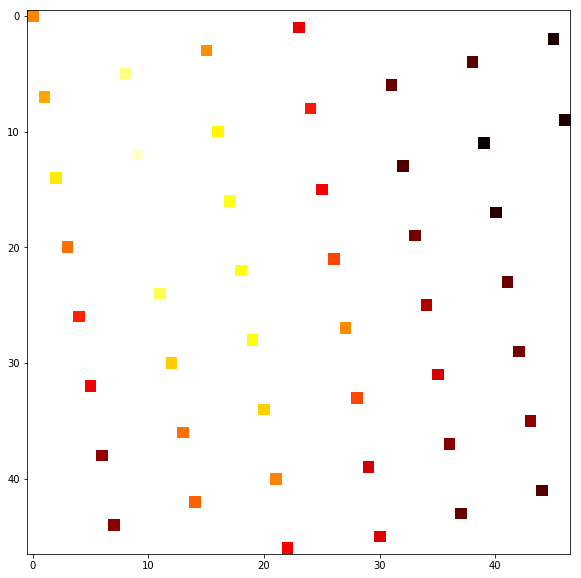

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(df_nc_fil.pivot('lon', 'lat', 'NO2').values, cmap='hot', interpolation='none')

Lat and long are not equally separated, so the above representation is distorted.
Current interpolation:

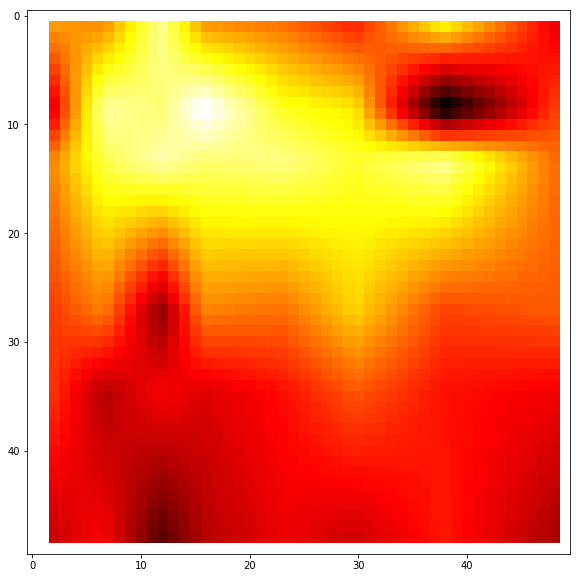

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(znew, cmap='hot', interpolation='nearest')

In [250]:
# Gets time of the satellite over the closest latitude to the sensor and rounds to next hour
pd.to_datetime(df_nc_fil[df_nc_fil.index == df_nc_fil['lon'].abs().idxmin()]['date']).dt.round('h')

15959   2019-03-20 14:00:00
Name: date, dtype: datetime64[ns]

In [80]:
df_nc_fil = df_nc[((df_nc['lon']>=low_lon) &
          (df_nc['lon']<=up_lon) &
          (df_nc['lat']>=low_lat) &
          (df_nc['lat']<=up_lat))]

In [81]:
df_nc_fil

,longitudes,latitudes,NO2,time,date,file,lon,lat


In [72]:
df_nc[df_nc['lon']<=0].sort_values('lon').iloc[-5]

longitudes                                             -3.75097
latitudes                                                41.146
NO2                                                 5.99899e-06
time                                                1.55309e+09
date                              2019-03-20 13:32:37.081360340
file          S5P_NRTI_L2__NO2____20190320T132831_20190320T1...
lon                                                 -0.00362548
lat                                                    0.726664
Name: 19599, dtype: object

In [61]:
df_nc[df_nc['lon']<=0].sort_values('lon').iloc[-5]

longitudes                                             -3.75097
latitudes                                                41.146
NO2                                                 5.99899e-06
time                                                1.55309e+09
date                              2019-03-20 13:32:37.081360340
file          S5P_NRTI_L2__NO2____20190320T132831_20190320T1...
lon                                                 -0.00362548
lat                                                    0.726664
Name: 19599, dtype: object

In [23]:
res = df_nc.pivot('lon', 'lat', 'NO2')